<a href="https://colab.research.google.com/github/keethu12345/Predictive_modelling_In_Lung_Cancer/blob/main/Lung_Nodule_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"padmalakshmis","key":"dfbf147971fb2927b7ce36760ecaeb8b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors
 99% 197M/199M [00:01<00:00, 163MB/s]
100% 199M/199M [00:01<00:00, 155MB/s]


In [ ]:
!unzip iqothnccd-lung-cancer-dataset.zip

Archive:  iqothnccd-lung-cancer-dataset.zip
  inflating: Test cases/000001_03_01_088.png  
  inflating: Test cases/000017_02_01_016.png  
  inflating: Test cases/000019_01_01_021.png  
  inflating: Test cases/000019_02_01_025.png  
  inflating: Test cases/000019_03_01_025.png  
  inflating: Test cases/000020_01_01_066.png  
  inflating: Test cases/000020_02_01_062.png  
  inflating: Test cases/000020_03_01_134.png  
  inflating: Test cases/000020_03_01_166.png  
  inflating: Test cases/000020_03_01_212.png  
  inflating: Test cases/000020_04_01_116.png  
  inflating: Test cases/000020_04_01_143.png  
  inflating: Test cases/000020_04_01_159.png  
  inflating: Test cases/000021_01_01_016.png  
  inflating: Test cases/000021_02_01_068.png  
  inflating: Test cases/000021_03_01_012.png  
  inflating: Test cases/000021_03_01_017.png  
  inflating: Test cases/000021_04_01_090.png  
  inflating: Test cases/000027_01_01_113.png  
  inflating: Test cases/000027_02_01_105.png  
  inflating: Tes

In [ ]:
!ls

 iqothnccd-lung-cancer-dataset.zip   sample_data  'The IQ-OTHNCCD lung cancer dataset'
 kaggle.json			    'Test cases'


Identify path of each folder

In [ ]:
import os

# List the contents of the main directory
main_dir = '/content/'
for root, dirs, _ in os.walk(main_dir):
    print(f"Root: {root}")
    for dir_name in dirs:
        print(f"Dir: {os.path.join(root, dir_name)}")

Root: /content/
Dir: /content/.config
Dir: /content/Test cases
Dir: /content/The IQ-OTHNCCD lung cancer dataset
Dir: /content/sample_data
Root: /content/.config
Dir: /content/.config/configurations
Dir: /content/.config/logs
Root: /content/.config/configurations
Root: /content/.config/logs
Dir: /content/.config/logs/2024.10.11
Root: /content/.config/logs/2024.10.11
Root: /content/Test cases
Root: /content/The IQ-OTHNCCD lung cancer dataset
Dir: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset
Root: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset
Dir: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases
Dir: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Benign cases
Dir: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases
Dir: /content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/.ipynb_ch

## DATA PREPROCESSING AND SPLITTING
What this does:
1. Loads images from each class folder (Benign, Malignant, Normal).
2. Resizes all images to 256x256 pixels and normalizes them.
3. Labels the images as 0: Normal, 1: Benign, 2: Malignant.
4. One-hot encodes the labels for classification.
5. Splits the data into training (80%) and testing (20%) sets.
6. Reshapes the images to be compatible with CNN and U-Net.







In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths based on your structure
test_cases_path = '/content/Test cases'
dataset_path = '/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

# Load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (256, 256))  # Resize to 256x256
            img = img / 255.0  # Normalize the images
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load images from benign, malignant, and normal folders
benign_images, benign_labels = load_images_from_folder(os.path.join(dataset_path, 'Benign cases'), 1)
malignant_images, malignant_labels = load_images_from_folder(os.path.join(dataset_path, 'Malignant cases'), 2)
normal_images, normal_labels = load_images_from_folder(os.path.join(dataset_path, 'Normal cases'), 0)

# Combine all images and labels
X = np.concatenate((benign_images, malignant_images, normal_images), axis=0)
y = np.concatenate((benign_labels, malignant_labels, normal_labels), axis=0)

# One-hot encoding the labels (0: Normal, 1: Benign, 2: Malignant)
y = to_categorical(y, num_classes=3)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape images for CNN (add channel dimension)
X_train = X_train.reshape(-1, 256, 256, 1)
X_test = X_test.reshape(-1, 256, 256, 1)

print("Data Preprocessing Done. Training data shape:", X_train.shape, "Testing data shape:", X_test.shape)

Data Preprocessing Done. Training data shape: (877, 256, 256, 1) Testing data shape: (220, 256, 256, 1)


## Building CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
def build_cnn_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 3 classes: Normal, Benign, Malignant

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate and compile the model
cnn_model = build_cnn_model()

# Model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,087,363 (49.92 MB)

 Trainable params: 13,087,363 (49.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
cnn_model.save('lung_nodule_cnn_model.h5')

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 363ms/step - accuracy: 0.4741 - loss: 0.9848 - val_accuracy: 0.6364 - val_loss: 0.8199
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.6925 - loss: 0.7442 - val_accuracy: 0.7409 - val_loss: 0.7406
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8188 - loss: 0.4596 - val_accuracy: 0.8182 - val_loss: 0.4466
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9113 - loss: 0.2007 - val_accuracy: 0.9000 - val_loss: 0.2787
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9476 - loss: 0.1335 - val_accuracy: 0.9182 - val_loss: 0.2643
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9876 - loss: 0.0426 - val_accuracy: 0.9818 - val_loss: 0.0794
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9886 - loss: 0.0433 - val_accuracy: 0.9773 - val_loss: 0.0655
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9962 - loss: 0.0200 - val_accuracy: 0.9818 -

## Building U-Net model for segmentation

In [ ]:
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Contracting path (Encoder)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    # Expanding path (Decoder)
    up6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    # Output layer
    conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)

    # Compile the model


    return model

# Instantiate and compile the U-Net model
unet = unet_model()

unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
unet.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 256, 256, 64)   │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 128, 128, 64)   │              0 │ conv2d_24[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 64, 64, 128)    │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 32, 32, 256)    │              0 │ conv2d_28[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_29[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 16, 16, 512)    │              0 │ conv2d_30[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_4        │ (None, 32, 32, 512)    │      2,097,664 │ conv2d_32[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4        

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

# Training U-Net Model

In [ ]:
import os
import cv2
import numpy as np

# Load images and masks for segmentation (directly from Test cases folder)
def load_test_images_and_masks(folder):
    images = []
    masks = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (256, 256)) / 255.0  # Resize and normalize the image
            # Create a binary mask based on intensity threshold
            mask = np.where(img > 0.5, 1, 0)  # Assuming the nodules are marked with higher intensities
            images.append(img)
            masks.append(mask)
        else:
            print(f"Warning: Unable to load image {img_path}, skipping.")
    return np.array(images), np.array(masks)

# Path to Test cases folder
test_cases_path = '/content/Test cases'

# Load test images and masks
X_test_images, y_test_masks = load_test_images_and_masks(test_cases_path)

# Check data shapes
print(f"Shape of X_test_images: {X_test_images.shape}")
print(f"Shape of y_test_masks: {y_test_masks.shape}")

# Reshape for U-Net (ensure proper reshaping)
X_test_images = X_test_images.reshape(-1, 256, 256, 1)
y_test_masks = y_test_masks.reshape(-1, 256, 256, 1)

# Check reshaped data
print(f"Reshaped X_test_images: {X_test_images.shape}")
print(f"Reshaped y_test_masks: {y_test_masks.shape}")

# Train U-Net model
unet.fit(X_test_images, y_test_masks, epochs=10, batch_size=8, validation_split=0.2)

# Save the model
unet.save('lung_nodule_unet_model.h5')

Shape of X_test_images: (197, 256, 256)
Shape of y_test_masks: (197, 256, 256)
Reshaped X_test_images: (197, 256, 256, 1)
Reshaped y_test_masks: (197, 256, 256, 1)
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.7298 - loss: 0.5983 - val_accuracy: 0.9610 - val_loss: 0.1777
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 479ms/step - accuracy: 0.9589 - loss: 0.1452 - val_accuracy: 0.9762 - val_loss: 0.0585
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 445ms/step - accuracy: 0.9780 - loss: 0.0561 - val_accuracy: 0.9866 - val_loss: 0.0368
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - accuracy: 0.9851 - loss: 0.0381 - val_accuracy: 0.9904 - val_loss: 0.0271
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 441ms/step - accuracy: 0.9855 - loss: 0.0357 - val_accuracy: 0.9895 - val_loss: 0.0278
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 472ms/step - accuracy: 0.9877 - loss: 0.0311 - val_accuracy: 0.9908 - val_loss: 0.0231
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 440ms/step - accuracy: 0

## Model Evaluation using Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix

# Function to calculate Dice Coefficient
def dice_coefficient(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (np.sum(y_true_f) + np.sum(y_pred_f))

# Function to calculate IOU (Intersection over Union)
def iou_score(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    union = np.sum(y_true_f) + np.sum(y_pred_f) - intersection
    return intersection / union

# Function to calculate Sensitivity and Specificity
def sensitivity_specificity(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true_f, y_pred_f).ravel()

    # Sensitivity: tp / (tp + fn)
    sensitivity = tp / (tp + fn)

    # Specificity: tn / (tn + fp)
    specificity = tn / (tn + fp)

    return sensitivity, specificity

# Get model predictions (binary thresholding at 0.5)
y_pred_masks = unet.predict(X_test_images)
y_pred_masks = np.where(y_pred_masks > 0.5, 1, 0)

# Evaluate Dice Coefficient, IOU, Sensitivity, and Specificity
dice = dice_coefficient(y_test_masks, y_pred_masks)
iou = iou_score(y_test_masks, y_pred_masks)
sensitivity, specificity = sensitivity_specificity(y_test_masks, y_pred_masks)

print(f"Dice Coefficient: {dice}")
print(f"IOU Score: {iou}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step
Dice Coefficient: 0.9881529450486203
IOU Score: 0.9765833089232069
Sensitivity: 0.9855604509491019
Specificity: 0.9965931511626611


Visualizing ground truth mask vs predicted mask

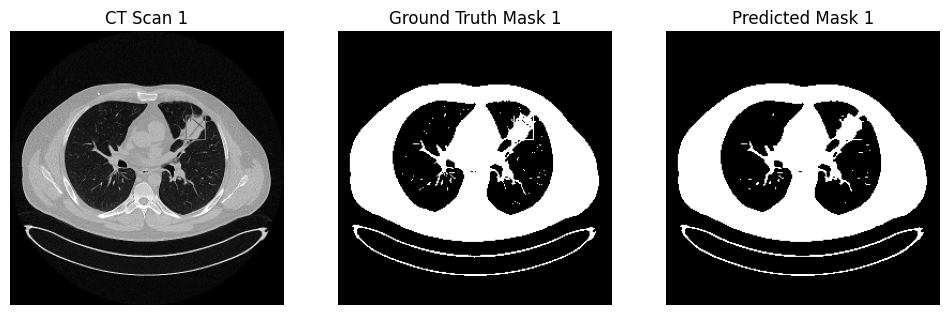

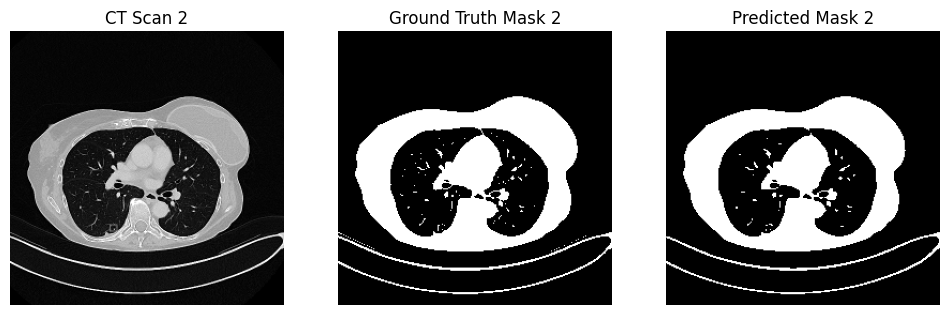

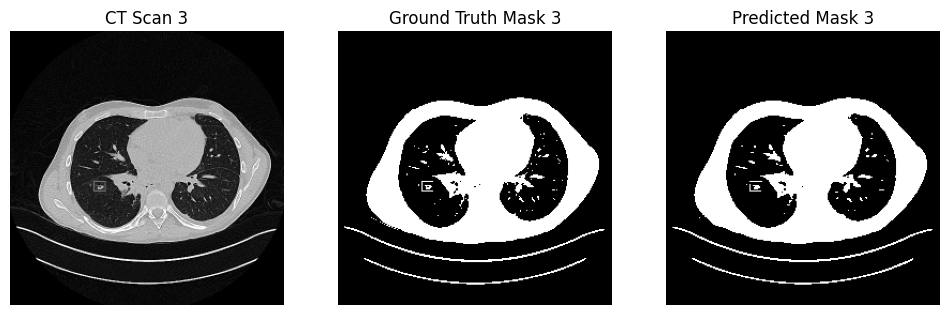

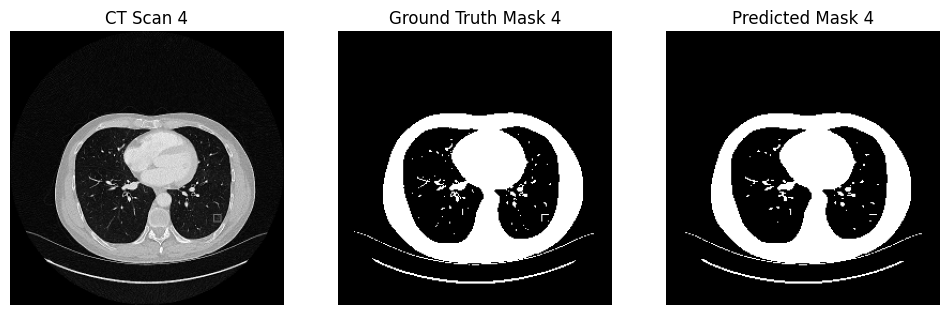

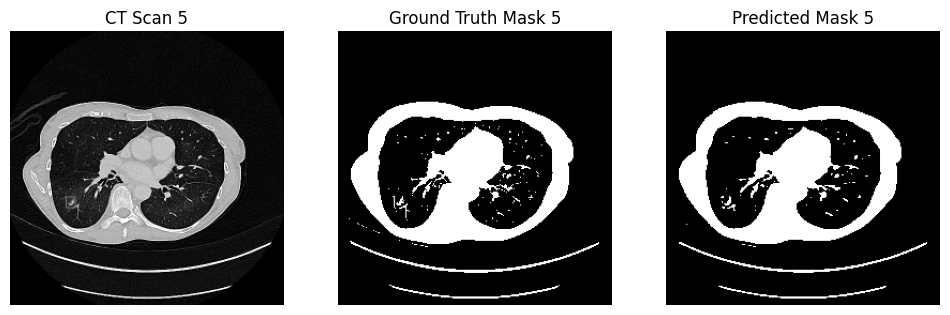

In [ ]:
import matplotlib.pyplot as plt

# Function to display a CT scan, the ground truth mask, and the predicted mask
def display_prediction(image, ground_truth_mask, predicted_mask, index):
    plt.figure(figsize=(12, 6))

    # Show the original CT scan image
    plt.subplot(1, 3, 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"CT Scan {index+1}")
    plt.axis('off')

    # Show the ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth_mask.squeeze(), cmap='gray')
    plt.title(f"Ground Truth Mask {index+1}")
    plt.axis('off')

    # Show the predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask.squeeze(), cmap='gray')
    plt.title(f"Predicted Mask {index+1}")
    plt.axis('off')

    plt.show()

# Select some samples to visualize
num_samples_to_visualize = 5  # You can increase this number to see more samples
for i in range(num_samples_to_visualize):
    display_prediction(X_test_images[i], y_test_masks[i], y_pred_masks[i], i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


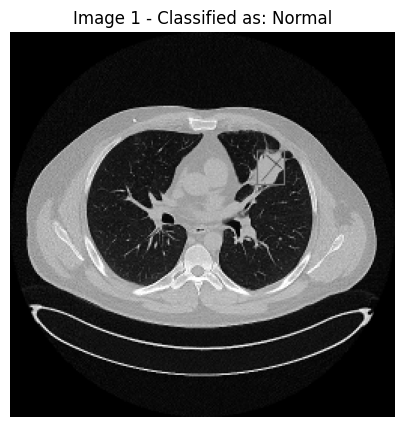

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


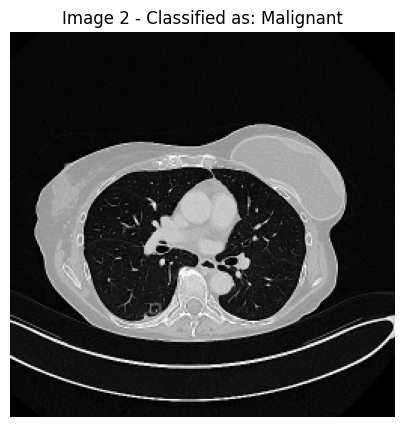

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


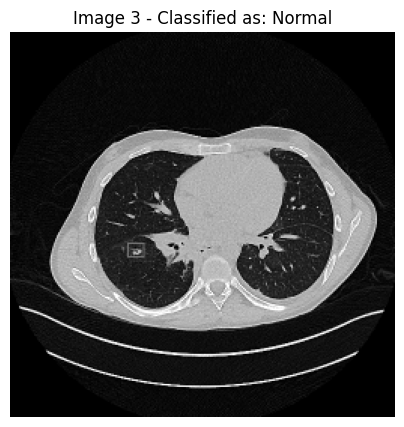

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


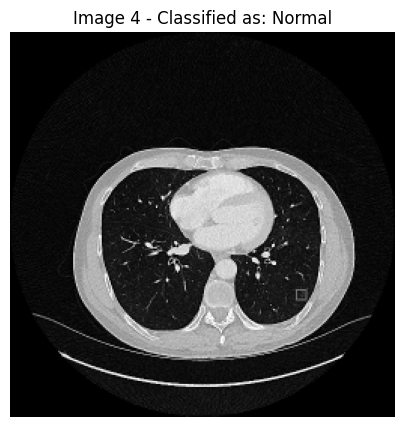

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


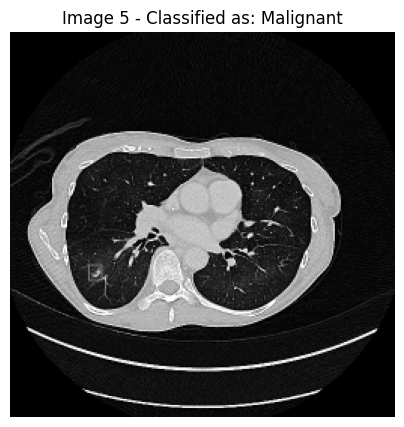

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


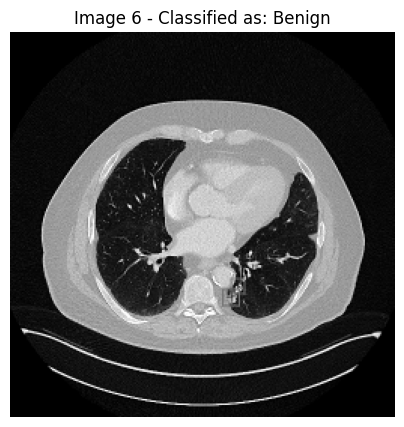

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


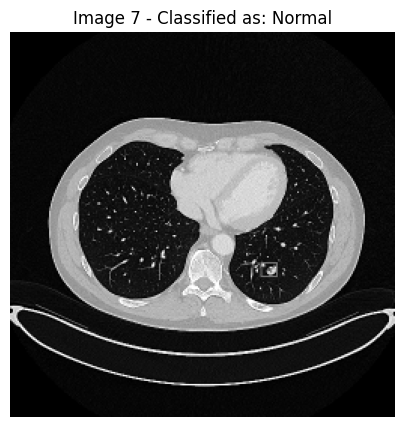

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


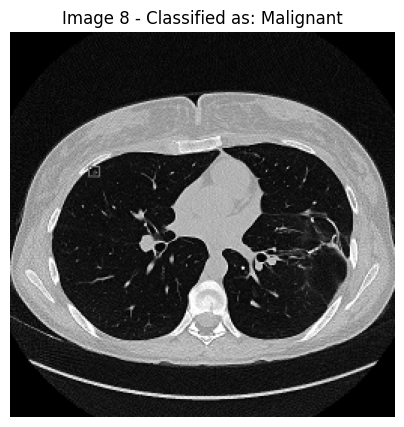

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


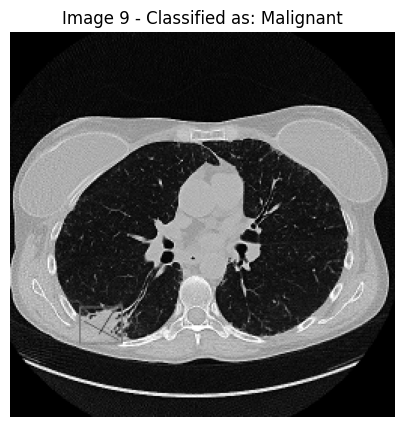

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


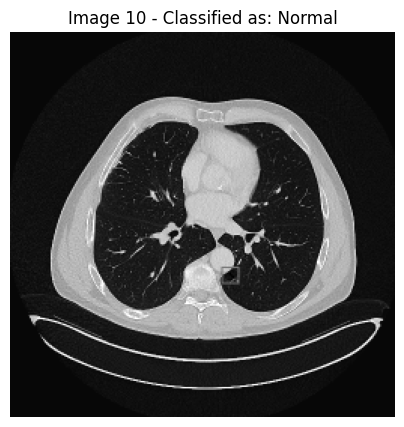

In [ ]:
# Function to classify multiple images
def classify_images(images, model, num_images=10):
    class_labels = {0: 'Normal', 1: 'Benign', 2: 'Malignant'}

    for i in range(num_images):
        # Select the image
        image = images[i]

        # Reshape the image to (1, 256, 256, 1)
        if len(image.shape) == 2:  # If 2D (H, W), add channel and batch dimensions
            image = image.reshape(1, 256, 256, 1)
        elif len(image.shape) == 3:  # If already (H, W, 1), add batch dimension
            image = np.expand_dims(image, axis=0)

        # Predict the class
        prediction = model.predict(image)
        class_index = np.argmax(prediction, axis=1)[0]
        predicted_label = class_labels[class_index]

        # Display the image and classification result
        plt.figure(figsize=(5, 5))
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Image {i+1} - Classified as: {predicted_label}")
        plt.axis('off')
        plt.show()

# Classify and display 10 images from the test set
classify_images(X_test_images, cnn_model, num_images=10)